In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
import matplotlib.pyplot as plt
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = YOLO(f'best.pt')

Saving patas.png to patas.png


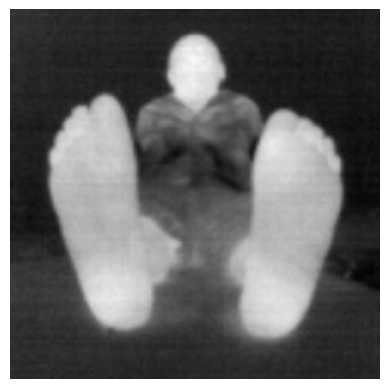

In [ ]:
def resize_image(image_path):
    # Lee la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convierte de BGR a RGB

    # Obtiene las dimensiones de la imagen
    height, width = image.shape[:2]

    # Determina el factor de escala
    if max(height, width) > 640:
        # Si la imagen es más grande que 640 en cualquier dimensión, reduce su tamaño
        scale_factor = 640.0 / max(height, width)
    else:
        # Si la imagen es más pequeña que 640 en ambas dimensiones, amplía su tamaño
        scale_factor = 640.0 / max(height, width)

    # Calcula las nuevas dimensiones
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Redimensiona la imagen
    resized_image = cv2.resize(image, (new_width, new_height))

    # Crea una imagen base blanca de 640x640
    base_image = np.ones((640, 640, 3), dtype=np.uint8) * 255

    # Calcula las coordenadas para centrar la imagen redimensionada en la imagen base
    x_offset = (640 - new_width) // 2
    y_offset = (640 - new_height) // 2

    # Coloca la imagen redimensionada en la imagen base
    base_image[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized_image

    return base_image

# Carga una imagen desde tu computadora
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Redimensiona la imagen y agrega espacio vacío
img = resize_image(image_path)

# Muestra la imagen resultante
plt.imshow(img)
plt.axis('off')
plt.show()

Saving patas2.jpeg to patas2 (1).jpeg


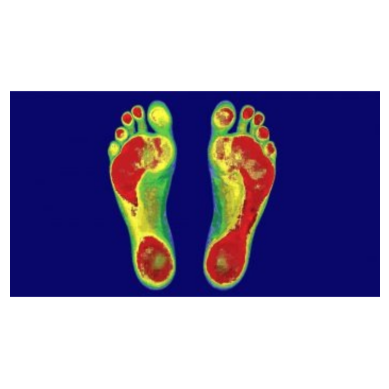

In [ ]:
def resize_image(image_path):
    # Lee la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convierte de BGR a RGB

    # Obtiene las dimensiones de la imagen
    height, width = image.shape[:2]

    # Calcula las nuevas dimensiones manteniendo la relación de aspecto
    if height > width:
        scale_factor = 640.0 / height
    else:
        scale_factor = 640.0 / width

    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)

    # Redimensiona la imagen
    resized_image = cv2.resize(image, (new_width, new_height))

    # Crea una imagen base blanca de 640x640
    base_image = np.ones((640, 640, 3), dtype=np.uint8) * 255

    # Calcula las coordenadas para centrar la imagen redimensionada en la imagen base
    x_offset = (640 - new_width) // 2
    y_offset = (640 - new_height) // 2

    # Coloca la imagen redimensionada en la imagen base
    base_image[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized_image

    return base_image

# El resto del código (carga de imagen, visualización, etc.) puede permanecer igual.

# Carga una imagen desde tu computadora
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Redimensiona la imagen y agrega espacio vacío
img = resize_image(image_path)

# Muestra la imagen resultante
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
results = model.predict(source=img, conf=0.25)


0: 640x640 1 foot, 973.5ms
Speed: 1.2ms pre-process, 973.5ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
def apply_mask(image, mask):
    # Asegura que la máscara sea binaria (0 o 1)
    binary_mask = np.where(mask > 0, 1, 0)

    # Multiplica la imagen por la máscara para obtener el recorte
    masked_image = image * binary_mask[:, :, np.newaxis]

    return masked_image

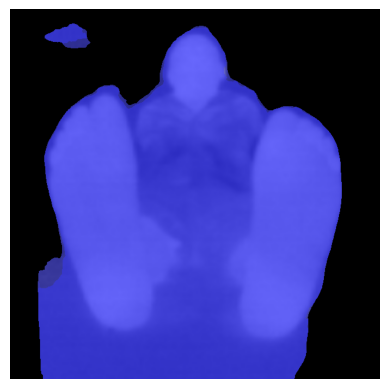

In [ ]:
for r in results:
    masks=r.masks.masks.cpu().numpy()
    for mask in masks:
        masked_img = apply_mask(img, mask)
        plt.imshow(masked_img)
        plt.axis('off')
        plt.show()